In [32]:
#pip install plotly

In [33]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
%matplotlib inline
import warnings

In [34]:
warnings.filterwarnings("ignore")

In [35]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
file_date

'04-08-2020'

In [36]:
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'

In [37]:
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

In [38]:
### Quick look at the  dataframe
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-08 22:51:58,34.223334,-82.461707,5,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-08 22:51:58,30.295065,-92.414197,86,2,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-08 22:51:58,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-08 22:51:58,43.452658,-116.241552,438,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-08 22:51:58,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [39]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS               True
Admin2             True
Province_State     True
Country_Region    False
Last_Update       False
Lat                True
Long_              True
Confirmed         False
Deaths            False
Recovered         False
Active            False
Combined_Key      False
dtype: bool

In [40]:
### Replace NaN values by 0
df.fillna(0, inplace=True)

In [41]:
# Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)

In [42]:
###Set the country name as index
df_countries.set_index('Country_Region', inplace=True)

In [43]:
### Group datas by Country
df_countries=df_countries.groupby('Country_Region').sum()

In [44]:
### Sort 15 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top 15 entries
df_countries_top15 = df_countries.head(15)
###Index columns as DataFrame series
cols = df_countries_top15.keys()
###Some Active data are missing , so let's do the maths to correst this
pd.options.mode.chained_assignment = None
df_countries_top15['Active'] = df_countries_top15['Confirmed'] - (df_countries_top15['Recovered'] + df_countries_top15 ['Deaths'])

In [45]:
df_countries_top15_grouped = df_countries_top15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_top15_grouped = df_countries_top15_grouped.reset_index()

In [46]:
### Show Countries with most Active cases
df_countries_top15_grouped_active = df_countries_top15_grouped[df_countries_top15_grouped['Active']==0]
df_countries_top15_grouped_active = df_countries_top15_grouped[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df_countries_top15_grouped_active = df_countries_top15_grouped.sort_values('Active', ascending=False)
df_countries_top15_grouped_active.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
13,US,429052,14695,23559,390798
7,Italy,139422,17669,26491,95262
10,Spain,148220,14792,48021,85407
4,France,113959,10887,21452,81620
5,Germany,113296,2349,46300,64647
14,United Kingdom,61474,7111,345,54018
12,Turkey,38226,812,1846,35568
6,Iran,64586,3993,29812,30781
8,Netherlands,20682,2255,272,18155
0,Belgium,23403,2240,4681,16482


In [47]:
df_countries_min15 = df_countries.tail(15)

In [48]:
df_countries_min15 = df_countries_min15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_min15 = df_countries_min15.reset_index()

In [49]:
### Show Countries with less Active cases
df_countries_min15_active = df_countries_min15[df_countries_min15['Active']==0]
df_countries_min15_active = df_countries_min15[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df_countries_min15_active = df_countries_min15.sort_values('Active', ascending=True)
df_countries_min15_active.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
5,Gambia,4,1,2,1
13,Timor-Leste,1,0,0,1
9,Papua New Guinea,2,0,0,2
12,South Sudan,2,0,0,2
1,Bhutan,5,0,2,3
3,Burundi,3,0,0,3
7,Mauritania,6,1,2,3
10,Sao Tome and Principe,4,0,0,4
14,Western Sahara,4,0,0,4
2,Botswana,6,1,0,5


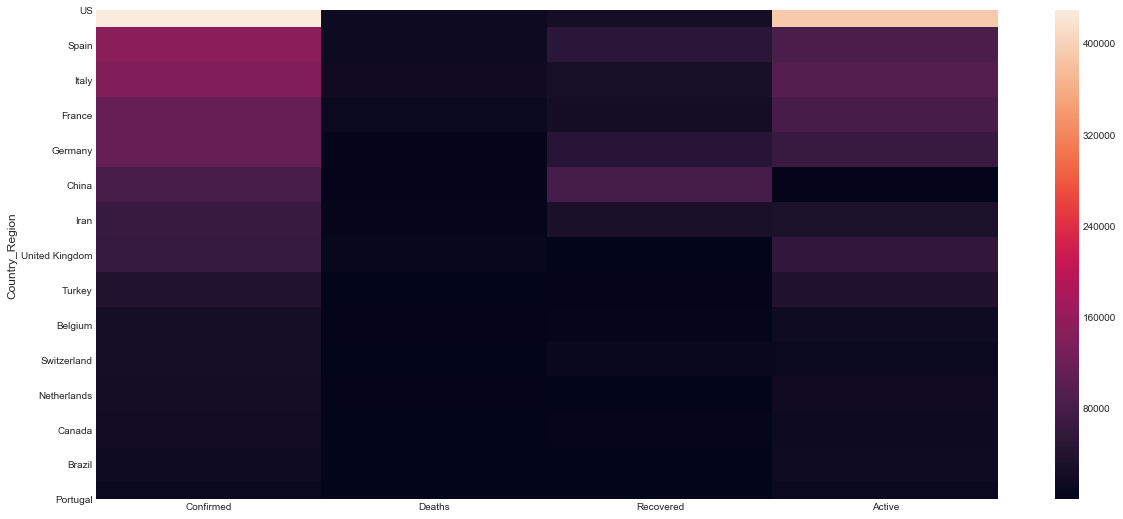

In [50]:
### Show heatmap
ax = plt.subplots(figsize=(18, 9))
sns.set_style("darkgrid")
sns.heatmap(df_countries_top15)

In [51]:
### Show Correlation Table 
df_countries_top15.describe()

,Confirmed,Deaths,Recovered,Active
count,15.000000,15.000000,15.000000,15.000000
mean,87124.066667,5509.400000,19641.533333,61973.133333
std,105574.540972,6011.131564,23028.095281,95923.814855
min,13141.000000,380.000000,127.000000,1905.000000
25%,21981.000000,857.000000,1095.500000,14902.000000
50%,61474.000000,2349.000000,9800.000000,30781.000000
75%,113627.500000,8999.000000,28151.500000,73133.500000
max,429052.000000,17669.000000,77567.000000,390798.000000


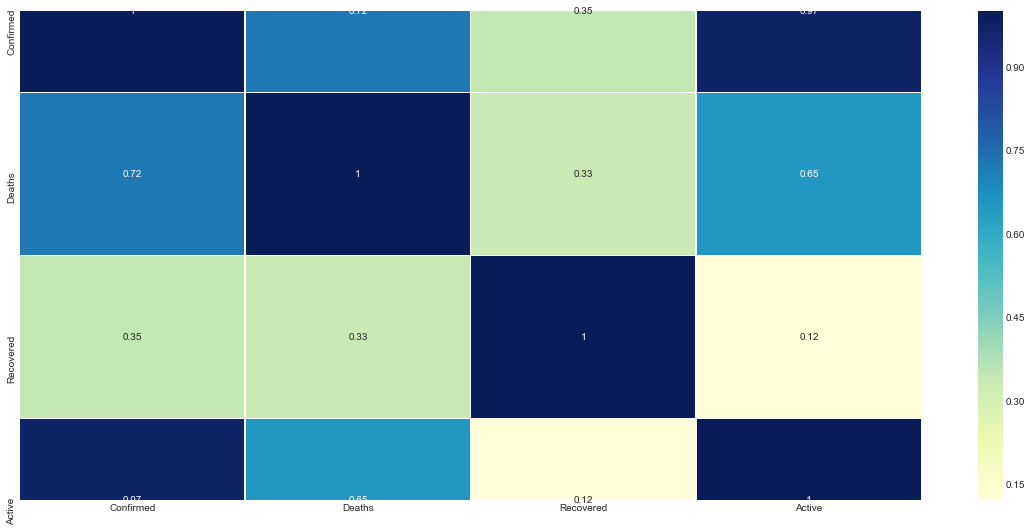

In [52]:
### Show heatmap Correlation 
ax = plt.subplots(figsize=(18, 9))
sns.heatmap(df_countries_top15.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

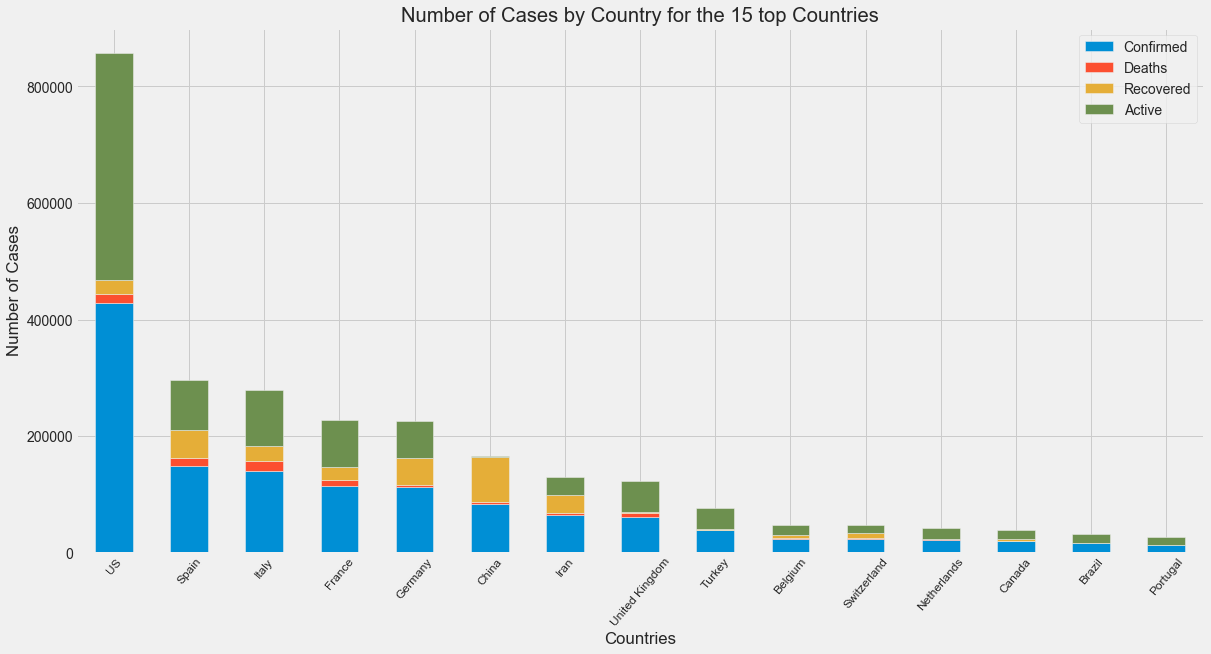

In [53]:
### Show Stacked Histogram
plt.style.use('fivethirtyeight')
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=True)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

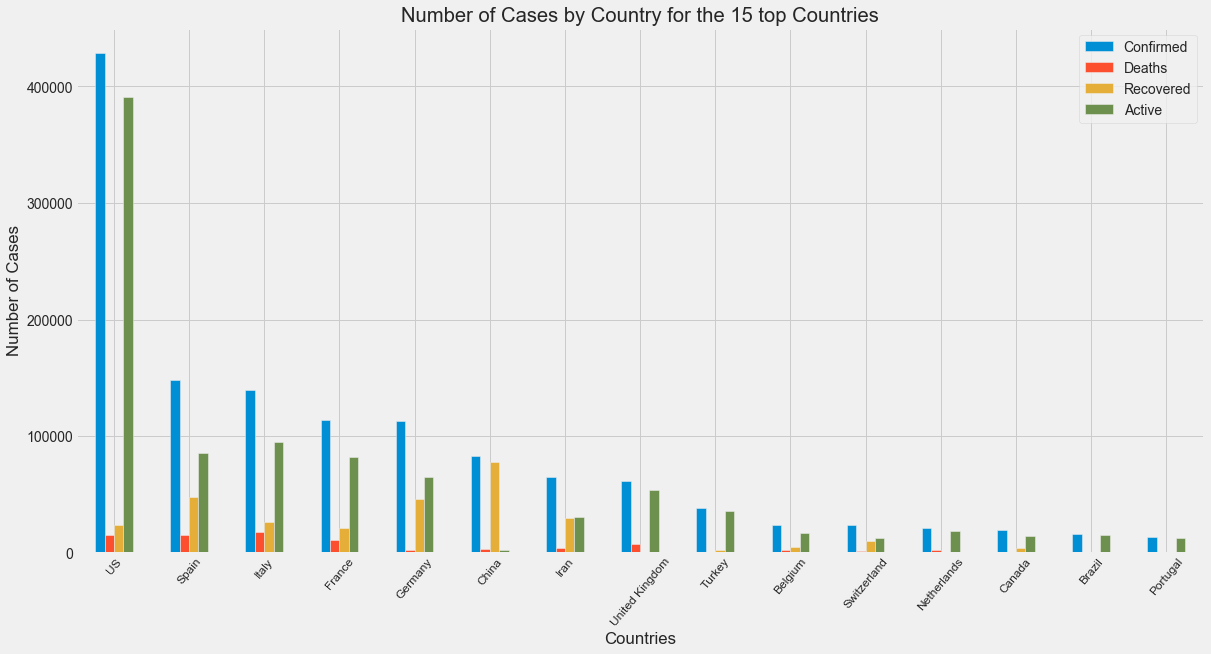

In [54]:
### Show Unstacked Histogram
plt.style.use('fivethirtyeight')
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=False)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

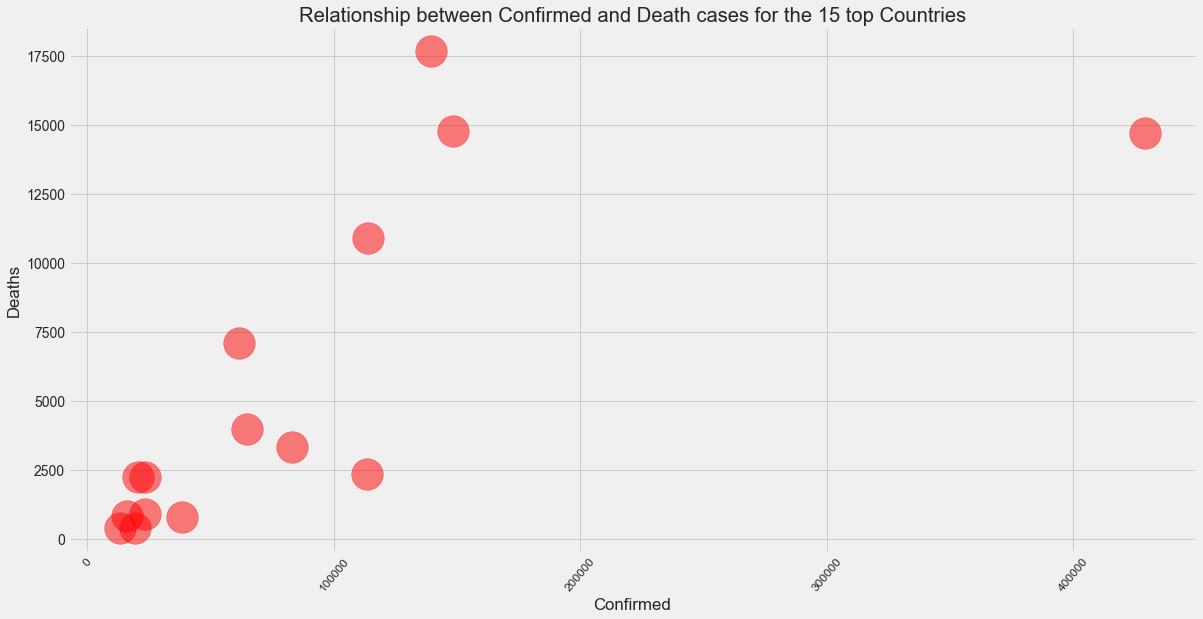

In [55]:
### Show Scatter plot
df_countries_top15.plot(kind='scatter' ,x='Confirmed',y='Deaths', alpha=0.5,color='red', figsize=(18, 9), s=1000)
plt.title('Relationship between Confirmed and Death cases for the 15 top Countries')
plt.ylabel('Deaths')
plt.xlabel('Confirmed')
plt.xticks(rotation=50, size=12)
plt.show()

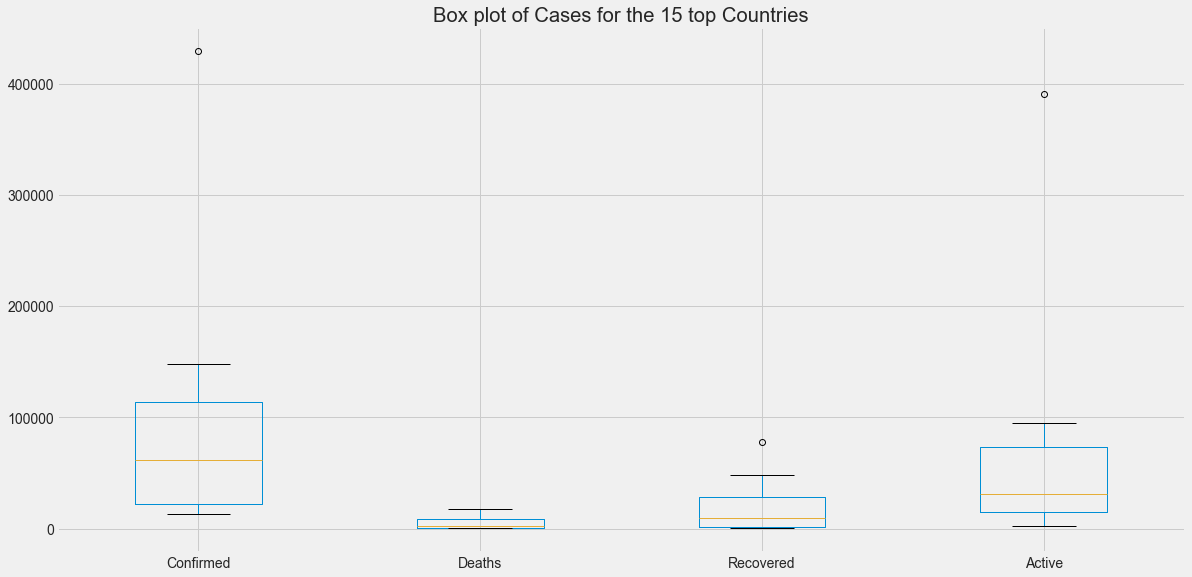

In [56]:
### Show Box plot
count = np.histogram(df_countries_top15, 15)
df_countries_top15.plot(kind ='box', 
          figsize=(18, 9))
plt.title('Box plot of Cases for the 15 top Countries')
plt.show()

In [57]:
### Sort 8 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top  entries
df_countries_top8= df_countries.head(8)
###Index columns as DataFrame series
cols = df_countries_top8.keys()
df_countries_top8.head(8)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,429052,14695,23559,390798
Spain,148220,14792,48021,85407
Italy,139422,17669,26491,95262
France,113959,10887,21452,81620
Germany,113296,2349,46300,64647
China,82809,3337,77567,1905
Iran,64586,3993,29812,30781
United Kingdom,61474,7111,345,54018


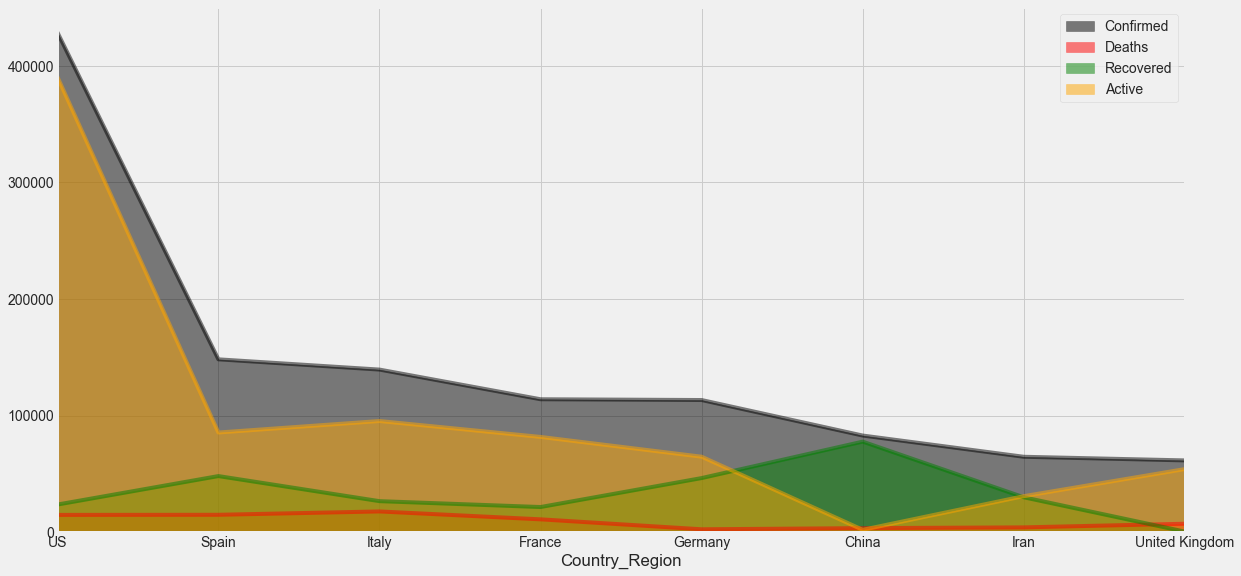

In [58]:
# Line plot top 8 countries
df_countries_top8.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['black', 'red', 'green', 'orange']) 
plt.show()

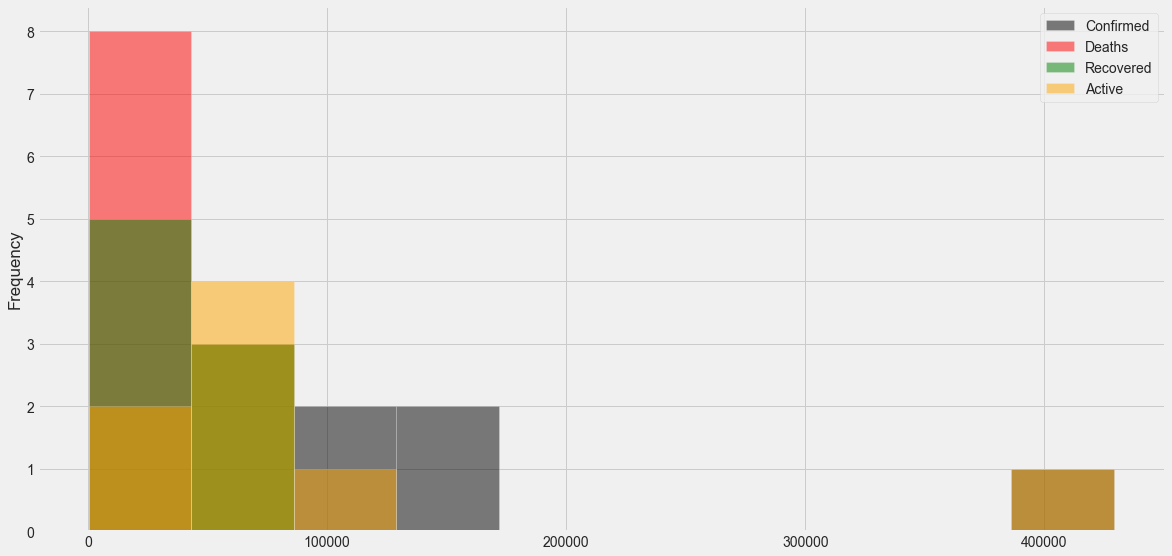

In [59]:
# Histogram plot top 8 countries
df_countries_top8.plot(kind='hist', figsize=(18, 9),stacked=False, 
             alpha=0.5,
            color=['black', 'red', 'green', 'orange']) 
plt.show()

In [60]:
#### to be continued ....